# Machine Learning (COSC 522)
## Project 4

## Mount Google Drive Folder (For Google Collab)

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [2]:
# Clone the repository if you're in Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=False)
def mount_and_change_dir(is_collab: bool = False):
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=False)
    # Set working directory
    project_path = '/content/drive/MyDrive/Projects/UTK/COSC522'
    os.chdir(project_path)
    print(os.listdir(project_path))
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(mount_and_change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

## Initializations

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ['png']

import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
import seaborn as sns
from scipy.stats import uniform, gaussian_kde, norm
from typing import *
from tqdm.notebook import tqdm

from custom_libs import ColorizedLogger

sns.set_style('darkgrid')

logger = ColorizedLogger('Project4', 'yellow')

### Load the two datasets and Preprocessing

In [4]:
# Located in <project root>/custom_libs/Project3
import custom_libs.Project4.data_loader as dl

In [5]:
# Create a Data Loader
datasets = ['xor', 'mnist']
data_loader = dl.DataLoader(datasets=datasets, data_folder='data')

In [6]:
# Print Statistics
data_loader.print_statistics()

2021-10-28 19:49:35 Data Loader  INFO     -- xor --
2021-10-28 19:49:35 Data Loader  INFO     	Shape: (4, 3)
2021-10-28 19:49:35 Data Loader  INFO     	Type: int64
2021-10-28 19:49:35 Data Loader  INFO     	Mean:
2021-10-28 19:49:35 Data Loader  INFO     		[0.5 0.5 0.5] (..)
2021-10-28 19:49:35 Data Loader  INFO     	Max:
2021-10-28 19:49:35 Data Loader  INFO     		[1 1 1] (..)
2021-10-28 19:49:35 Data Loader  INFO     	Min:
2021-10-28 19:49:35 Data Loader  INFO     		[0 0 0] (..)
2021-10-28 19:49:35 Data Loader  INFO     	Head:
2021-10-28 19:49:35 Data Loader  INFO     		[0 0 0] (..)
2021-10-28 19:49:35 Data Loader  INFO     -- mnist_tr_x --
2021-10-28 19:49:35 Data Loader  INFO     	Shape: (60000, 784)
2021-10-28 19:49:35 Data Loader  INFO     	Type: uint8
2021-10-28 19:49:35 Data Loader  INFO     	Mean:
2021-10-28 19:49:35 Data Loader  INFO     		[0. 0. 0. 0.] (..)
2021-10-28 19:49:35 Data Loader  INFO     	Max:
2021-10-28 19:49:35 Data Loader  INFO     		[0 0 0 0] (..)
2021-10-28 1

In [7]:
# Get the two datasets
datasets = data_loader.get_datasets()
xor_data = datasets['xor']
mnist_tr_x, mnist_tr_y, mnist_te_x, mnist_te_y = datasets['mnist']
print(xor_data)

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


## Task 1

In [8]:
# Located in <project root>/custom_libs/Project4
import custom_libs.Project4.models as p4_models

In [10]:
n_units = [xor_data.shape[1]-1, 4, 3, xor_data[:, -1].max()+1]
activations = ["sigmoid", "sigmoid", "sigmoid"]
lr = 0.1
batch_size = 1
max_epochs = 2000
shuffle = False
seed = None#3
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, seed=seed)
accuracies, losses = mlp.train(train=xor_data.copy(), shuffle=shuffle, batch_size=batch_size, lr=lr, 
          max_epochs=max_epochs, debug=debug)


2021-10-28 19:50:22 Project4 Models INFO     Shapes of biases: [(4, 1), (3, 1), (2, 1)]
2021-10-28 19:50:22 Project4 Models INFO     Shapes of weights: [(4, 2), (3, 4), (2, 3)]
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 1
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.14147
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 2
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.14615
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 3
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.15091
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 4
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.15573
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO   

2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.28571
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 36
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.28834
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 37
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.29087
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 38
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.29330
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 39
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.29563
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 40
2021-10-28 19:50:22 

2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.33409
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 71
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.33463
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 72
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.33515
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 73
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.33564
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 74
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.33611
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 75
2021-10-28 19:50:22 

2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34341
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 106
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34350
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 107
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34359
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 108
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34368
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 109
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34377
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 110
2021-10-28 19:5

2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34501
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 141
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34502
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 142
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34504
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 143
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34505
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 144
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34506
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 145
2021-10-28 19:5

2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34520
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 176
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34520
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 177
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34520
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 178
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34520
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 179
2021-10-28 19:50:22 Project4 Models INFO       Loss: 0.34519
2021-10-28 19:50:22 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:22 Project4 Models INFO     Epoch: 180
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34512
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 211
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34512
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 212
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34511
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 213
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34511
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 214
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34511
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 215
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34499
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 246
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34498
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 247
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34498
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 248
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34497
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 249
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34497
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 250
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34483
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 281
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34483
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 282
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34482
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 283
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34482
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 284
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34481
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 285
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34466
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 316
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34466
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 317
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34465
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 318
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34464
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 319
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34464
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 320
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34447
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 351
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34447
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 352
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34446
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 353
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34446
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 354
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34445
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 355
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34427
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 386
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34426
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 387
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34425
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 388
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34425
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 389
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34424
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 390
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34404
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 421
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34403
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 422
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34402
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 423
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34402
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 424
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34401
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 425
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34379
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 456
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34378
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 457
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34377
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 458
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34376
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 459
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34376
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 460
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34351
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 491
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34350
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 492
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34349
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 493
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34348
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 494
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34348
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 495
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34320
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 526
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34319
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 527
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34318
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 528
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34317
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 529
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34316
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 530
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34286
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 561
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34285
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 562
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34284
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 563
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34283
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 564
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34282
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 565
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34248
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 596
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34247
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 597
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34246
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 598
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34245
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 599
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34244
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 600
2021-10-28 19:5

2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34206
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 631
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34205
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 632
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34203
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 633
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34202
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 634
2021-10-28 19:50:23 Project4 Models INFO       Loss: 0.34201
2021-10-28 19:50:23 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:23 Project4 Models INFO     Epoch: 635
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34158
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 666
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34157
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 667
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34156
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 668
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34154
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 669
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34153
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 670
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34105
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 701
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34104
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 702
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34102
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 703
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34100
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 704
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34099
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 705
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34046
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 736
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34044
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 737
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34042
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 738
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34040
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 739
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.34038
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 740
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33978
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 771
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33976
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 772
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33974
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 773
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33972
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 774
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33970
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 775
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33902
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 806
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33900
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 807
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33897
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 808
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33895
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 809
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33893
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 810
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33815
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 841
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33813
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 842
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33810
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 843
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33808
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 844
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33805
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 845
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33717
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 876
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33714
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 877
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33711
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 878
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33708
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 879
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33705
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 880
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33604
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 911
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33600
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 912
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33597
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 913
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33593
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 914
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33590
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 915
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33474
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 946
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33470
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 947
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33466
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 948
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33462
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 949
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33458
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 950
2021-10-28 19:5

2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33324
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 981
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33319
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 982
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33315
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 983
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33310
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 984
2021-10-28 19:50:24 Project4 Models INFO       Loss: 0.33305
2021-10-28 19:50:24 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 19:50:24 Project4 Models INFO     Epoch: 985
2021-10-28 19:5

2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1624
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.16999
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1625
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.16950
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1626
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.16901
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1627
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.16852
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1628
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.16803
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1659
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.15340
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1660
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.15295
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1661
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.15250
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1662
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.15204
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1663
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.15159
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.13867
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1694
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.13826
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1695
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.13785
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1696
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.13745
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1697
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.13704
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1698
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1728
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.12517
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1729
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.12481
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1730
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.12445
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1731
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.12410
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1732
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.12374
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1763
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.11341
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1764
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.11309
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1765
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.11278
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1766
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.11248
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1767
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.11217
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.10354
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1798
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.10327
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1799
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.10300
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1800
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.10274
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1801
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.10247
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1802
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1832
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.09481
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1833
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.09458
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1834
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.09435
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1835
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.09413
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1836
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.09390
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1867
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08734
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1868
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08714
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1869
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08695
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1870
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08675
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1871
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08656
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08110
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1902
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08093
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1903
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08076
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1904
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08059
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1905
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.08042
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1906
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1936
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07555
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1937
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07540
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1938
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07525
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1939
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07511
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1940
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07496
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28

2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1971
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07073
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1972
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07061
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1973
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07048
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1974
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07035
2021-10-28 19:50:26 Project4 Models INFO       Accuracy on training data: 4 / 4
2021-10-28 19:50:26 Project4 Models INFO     Epoch: 1975
2021-10-28 19:50:26 Project4 Models INFO       Loss: 0.07023
2021-10-28

In [11]:
def plot_results(losses, accuracies):
    subsample = 100
    losses_ = losses[::subsample]
    accuracies_ = accuracies[::subsample]
    x = np.arange(1, len(losses_)+1)

    plt.plot(x, losses_)
    plt.plot(x, accuracies_)


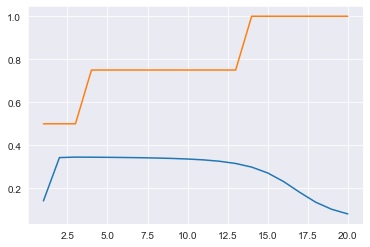

In [12]:
plot_results(losses, accuracies)

## Task 2

In [13]:
print(mnist_tr_x.shape)
print(mnist_tr_y.shape)
mnist_tr = np.concatenate([mnist_tr_x, mnist_tr_y], axis=1)
print(mnist_tr.shape)
print(mnist_tr[:, -1].max())

(60000, 784)
(60000, 1)
(60000, 785)
9


In [22]:
# mnist_tr_x, mnist_tr_y, mnist_te_x, mnist_te_y

n_units = [mnist_tr.shape[1]-1, 28, 25, mnist_tr[:, -1].max()+1]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]
lr = 0.01
batch_size = 5000
max_epochs = 4
shuffle = True
seed = 3
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, seed=seed)
accuracies, losses = mlp.train(train=mnist_tr.copy(), shuffle=shuffle, batch_size=batch_size, lr=lr, 
          max_epochs=max_epochs, debug=debug)

2021-10-28 20:13:41 Project4 Models INFO     Shapes of biases: [(28, 1), (25, 1), (10, 1)]
2021-10-28 20:13:41 Project4 Models INFO     Shapes of weights: [(28, 784), (25, 28), (10, 25)]
2021-10-28 20:13:41 Project4 Models INFO     Epoch: 1
2021-10-28 20:14:33 Project4 Models INFO       Loss: 5.85555
2021-10-28 20:14:33 Project4 Models INFO       Accuracy on training data: 6008 / 60000
2021-10-28 20:14:33 Project4 Models INFO     Epoch: 2
2021-10-28 20:15:12 Project4 Models INFO       Loss: 4.90956
2021-10-28 20:15:12 Project4 Models INFO       Accuracy on training data: 6042 / 60000
2021-10-28 20:15:12 Project4 Models INFO     Epoch: 3
2021-10-28 20:15:57 Project4 Models INFO       Loss: 4.18296
2021-10-28 20:15:57 Project4 Models INFO       Accuracy on training data: 6067 / 60000
2021-10-28 20:15:57 Project4 Models INFO     Epoch: 4
2021-10-28 20:16:56 Project4 Models INFO       Loss: 3.61301
2021-10-28 20:16:56 Project4 Models INFO       Accuracy on training data: 6075 / 60000


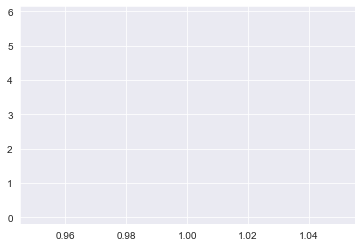

In [23]:
plot_results(losses, accuracies)

In [ ]:
F

## Task 3